## CSCI-UA 9473 Final Assignment

Total: 55pts

### Muhammad Wajahat Mirza

### Part III. Reinforcement learning (10pts)

In this last exercise, we will tackle a simple reinforcement learning problem. Consider the map given below. There are 5 rooms + the garden. We would like to train an agent to get out of the house as quickly as possible. To set up the evironment, we will consider 6 possible state (the rooms in which the agent is located) and 6 possible actions (moving from one room to any other room). 

The Q-table can thus be encoded by a $6$ by $6$ matrix. We will consider three types of rewards. Impossible moves (example 1 to 4) will be penalized by $1$. possible moves will be associated to a $0$ reward. Finally any move leading to an escape (e.g. 2 to 6) will be rewarded by 100. 


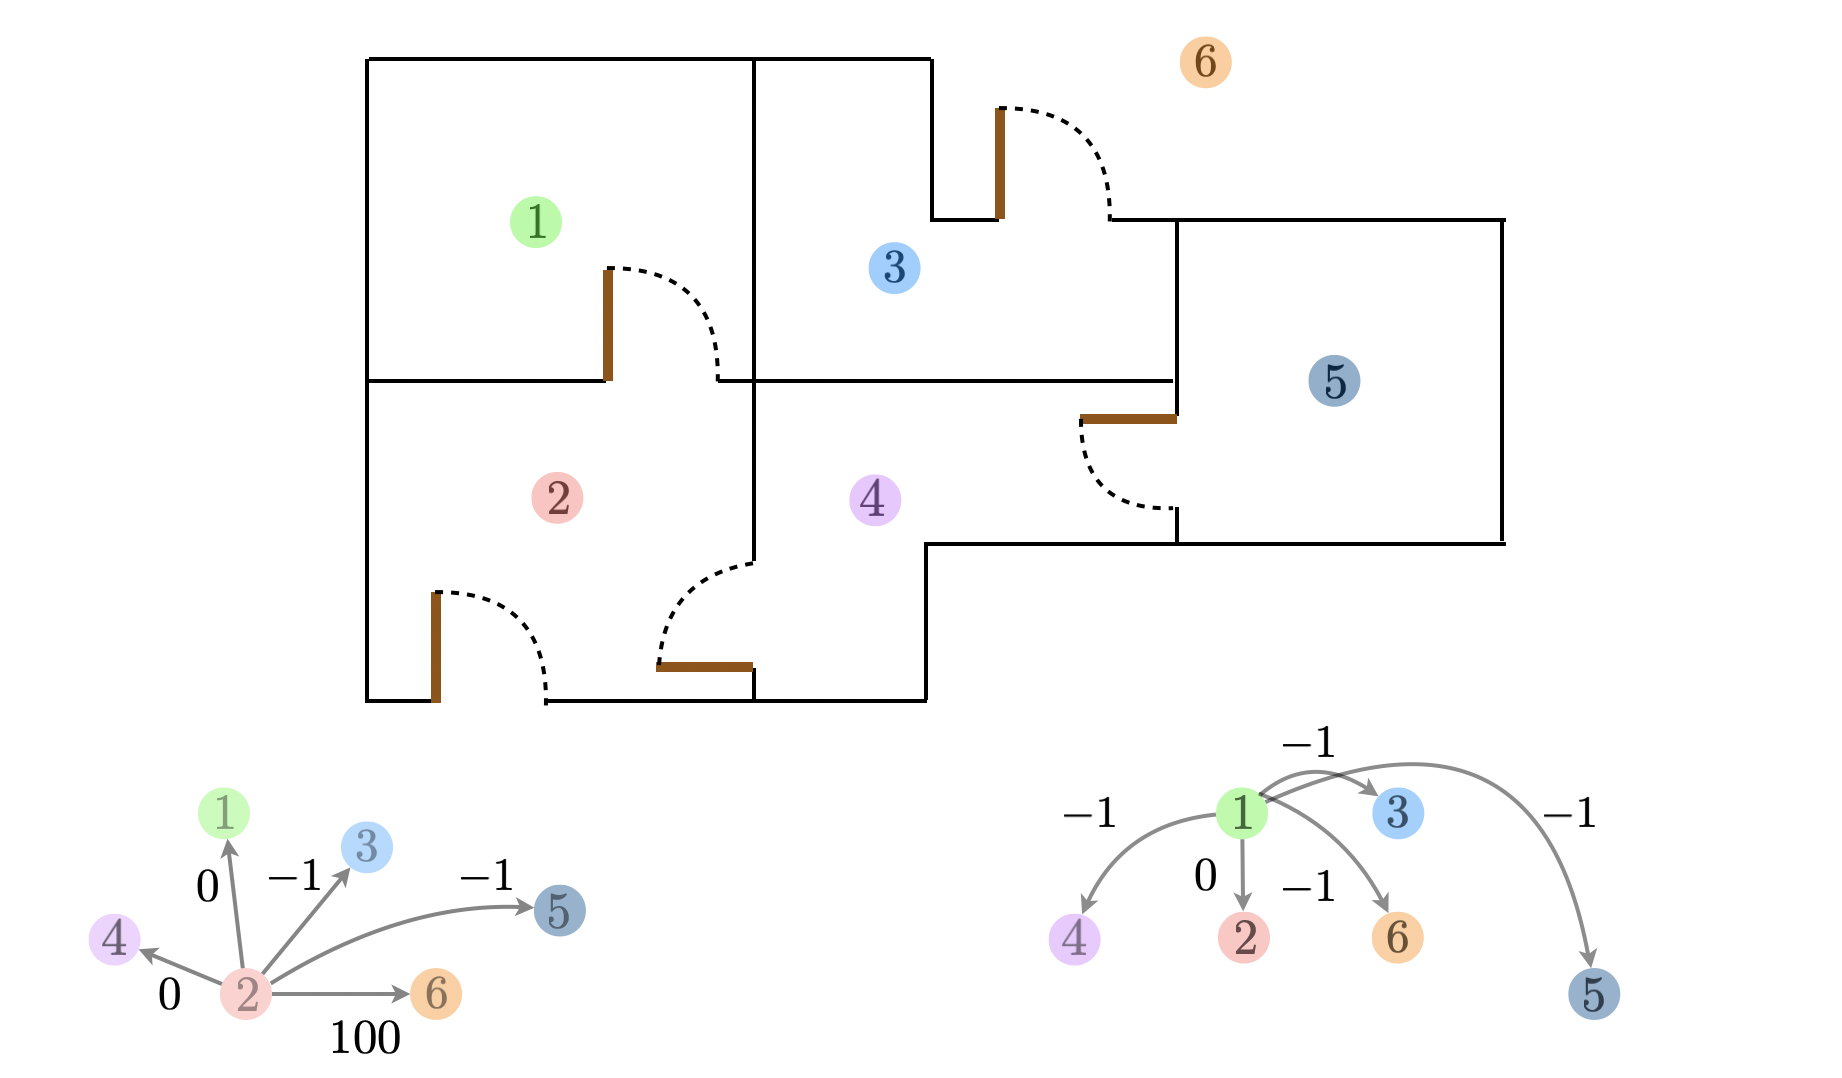

In [1]:
from IPython.display import Image
Image('QLearningImage2.png',width=600,height=600)

## Question III.1 (5pts)

As a first approach, we will just run a couple of pure exploration iterations. Just fill out the loop below and run a couple of 

## Solution
### Random Greedy Method: Brute Force 

                There was unclarity in the way Question was asked!

In [6]:
import numpy as np
import random
exit_moves = [(0,1),(4,3),(3,1),(2,5),(1,5)]
state, action = 6, 6
exit = 5

Curr_Room = 4

R = np.matrix(np.ones(shape=[state,action]))
R = R * -1 

### Initiating R Matrix and Random Greedy Move Functions

In [8]:
def update_R(exit_moves,R):
    for row in exit_moves:
        R[row] = 0
        if row[1] == exit:
            R[row] = 100
        row = row[::-1]
        R[row] = 0

    R[exit,exit] = 100
    
    return R
R = update_R(exit_moves,R)
print("\nUpdated Reward Matrix with possible moves:\n",R)

def greedy_move(Curr_Room,R):
    reward_state = R[Curr_Room,]
    all_possible_act = np.where(R[Curr_Room,] >= 0)[1]
    return all_possible_act

all_Moves = greedy_move(Curr_Room,R)

def rand_move(all_Moves):
    curr_action = random.choice(all_Moves)
    return curr_action

rand_action = rand_move(all_Moves)


Updated Reward Matrix with possible moves:
 [[ -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.   0.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.  -1. 100.]]


### Iterative Brute Force Method. This part is executed 15 times to avoid runtime Error.
#### Room is chosen Randomly. It is part of random explorative technique

In [9]:
print("\nSince No exploitative Moves were made, some of the anticipated moves may not be correct!\n")
done = False
c = 0
while c < 10: 
    if Curr_Room != exit:
        new_room = random.choice([0,1,2,3,4,5])
        all_Moves = greedy_move(new_room,R)
        rand_room = rand_move(all_Moves)
        all_rooms_moves = [x+1 for x in all_Moves]
        print("For Room {}, All possible moves are: {}\n".format(new_room+1, all_rooms_moves))
        Curr_Room = rand_room
    
    else:
        new_room = random.choice([0,1,2,3,4,5])
        Curr_Room = new_room
        print("Exit Room has been chosen Randomly. Greedy program terminated. \n")
    
    c+=1

print("\nBrute Force Greedy method Stopped!")


Since No exploitative Moves were made, some of the anticipated moves may not be correct!

For Room 6, All possible moves are: [2, 3, 6]

Exit Room has been chosen Randomly. Greedy program terminated. 

For Room 1, All possible moves are: [2]

For Room 1, All possible moves are: [2]

For Room 4, All possible moves are: [2, 5]

For Room 4, All possible moves are: [2, 5]

For Room 1, All possible moves are: [2]

For Room 5, All possible moves are: [4]

For Room 2, All possible moves are: [1, 4, 6]

Exit Room has been chosen Randomly. Greedy program terminated. 


Brute Force Greedy method Stopped!


## Question III.2 (5pts)

Now that you can solve the greedy approach. We will start to exploit and we will do that through the use of a $Q$ table. In this case, as indicated in the statement of the exercise, the Q-table is 6x6. Train the agent by alternating between exploitation and exploration. 

Since we want to update the $Q$-table, we will now add a line of the form 

$$Q[s, a] \leftarrow (1-\alpha)Q[s,a] + \alpha\left(R[a] + \gamma\max_{a'}Q[s',a']\right)$$

When in the exploration framework, we will sample the action at random as in Question III.1. When in the exploitation framework however, we will simply choose the action as the one that maximizes the entry in the $Q$-table for the particular state at which we are. Hence we have $a^* = \underset{a}{\operatorname{argmax}} Q[s,a]$. 


Code this epsilon-greedy approach below. You can start $\epsilon =0.8$ 
Take a sufficiently small learning rate (you can for example start with 0.5) and a relatively large discount factor $\gamma=0.9$ (You can later change those values to see how they affec the learning)

Once you are done with the algorithm, try a couple of different values for $\epsilon$ and describe the evolution in the learning. 

## Solution
### Unlike Q III.1, this solution provides most accurate and efficient pathway for Quickest Exit

#### Import Required Libraries

In [10]:
import numpy as np
import random

#### All possible moves in the given house

In [11]:
exit_moves = [(0,1),(4,3),(3,1),(2,5),(1,5)]
act_num = ([(x[0]+1, x[1]+1) for x in exit_moves])
print("\nAll Possible moves that can be made for exit:\n",act_num,"\n")


All Possible moves that can be made for exit:
 [(1, 2), (5, 4), (4, 2), (3, 6), (2, 6)] 



In [12]:
state, action = 6, 6
exit = 5

### Initializing Reward Matrix with -1 Values

In [13]:
reward_mat = np.matrix(np.ones(shape=[state,action]))
reward_mat = reward_mat * -1 
print("\nReward Matrix initialized with '-1'.\n\n",reward_mat)


Reward Matrix initialized with '-1'.

 [[-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1.]]


### Updating Reward Matrix

            If possible move == True:
                update it to "2"
            elif possible move == Exit:
                update it to "100"
            else: 
                keep it as "-1"

In [14]:
def update_reward(exit_moves,reward_mat):
    for row in exit_moves:
        reward_mat[row] = 0
        if row[1] == exit:
            reward_mat[row] = 100
        row = row[::-1]
        reward_mat[row] = 0

    reward_mat[exit,exit] = 100
    
    return reward_mat
reward_mat = update_reward(exit_moves,reward_mat)
print("\nUpdated Reward Matrix with possible moves:\n",reward_mat)


Updated Reward Matrix with possible moves:
 [[ -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1. 100.]
 [ -1.   0.  -1.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.]
 [ -1.   0.   0.  -1.  -1. 100.]]


### Initializing Brain Matrix
                This Matrix will be used to iterate through possible moves

In [15]:
brain_mat = np.matrix(np.zeros(shape=[state,action]))
print("\nThis is Brain Matrix:\n",brain_mat)


This is Brain Matrix:
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


### Function Possible moves to get all possible actions

In [16]:
def possible_move(curr_state):
    reward_state = reward_mat[curr_state,]
    all_possible_act = np.where(reward_state >= 0)[1]
    return all_possible_act


In [17]:
# ====================================================================================
# Put the any Room number here for training purposes
# ====================================================================================
room_train = 2

In [18]:
# ====================================================================================
# One is subtracted because all the rooms at the begining were '-1' for index purposes
curr_state = room_train - 1
# ====================================================================================
all_possible_act = possible_move(curr_state)
out_num = ([(x+1) for x in all_possible_act])
print("\nPossible moves from room {} are:\nRooms: {}".format(curr_state+1, out_num))


Possible moves from room 2 are:
Rooms: [1, 4, 6]


### From all the available moves, pick one randomly

In [19]:
def random_move(all_possible_act):
    curr_action = random.choice(all_possible_act)

    return curr_action

curr_action = random_move(all_possible_act)
print("\nThe random choice of move from room {} is {}\n".format(curr_state+1,curr_action +1))


The random choice of move from room 2 is 4



### Updating our Q-Matrix or Brain Matrix
                Use the following Equation for Update

$$Q[s, a] \leftarrow (1-\alpha)Q[s,a] + \alpha\left(R[a] + \gamma\max_{a'}Q[s',a']\right)$$


In [20]:
gamma = 0.8
alpha = 0.5

In [21]:
def brain_update(brain_mat,curr_state,curr_action,gamma,alpha):
    
    max_brain = np.max(brain_mat[curr_action,])
    first_term = (1-alpha)*(brain_mat[curr_state,curr_action])
    second_term = alpha * (reward_mat[curr_state,curr_action] + gamma * max_brain)
    
    brain_mat[curr_state,curr_action] = first_term + second_term
    
    return brain_mat

brain_mat = brain_update(brain_mat,curr_state, curr_action, gamma,alpha)

### Train our Q-learning Model

In [22]:
def iter_brain_update(curr_state, all_possible_act, brain_mat, gamma,alpha):
    rooms = [0,1,2,3,4,5]
    for i in range(1,100,1):
        new_curr_state = random.choice(rooms)
        new_possible_moves = possible_move(new_curr_state)
        new_random_move = random_move(new_possible_moves)
        brain_mat = brain_update(brain_mat,new_curr_state, new_random_move, gamma,alpha)
    
    brain_mat = brain_mat/np.max(brain_mat)*100
    print("Brain Matrix after training: \n{}".format(brain_mat))
    
    return brain_mat
brain_mat = iter_brain_update(curr_state, all_possible_act, brain_mat, gamma,alpha)

Brain Matrix after training: 
[[  0.          69.49619026   0.           0.           0.
    0.        ]
 [ 37.45471878   0.           0.          10.863273     0.
   96.92036711]
 [  0.           0.           0.           0.           0.
  100.        ]
 [  0.          50.30011359   0.           0.          25.47559499
    0.        ]
 [  0.           0.           0.          40.1824045    0.
    0.        ]
 [  0.          49.60679004  71.73612621   0.           0.
   79.86403338]]


## Test our Model and Append Quickest Possible Routes for Exit

In [23]:
def test(curr_room,exit,brain_mat):
    path = []
    path.append(curr_room)
    
    while curr_room != exit:
        next_room = np.where(brain_mat[curr_room,] == np.max(brain_mat[curr_room,]))[1]
        path.append(next_room[0])
        
        if len(next_room) > 1:
            next_room = random.choice(next_room)
        else:
            next_room = next_room
        
        curr_room = next_room
        
    return path

House Map


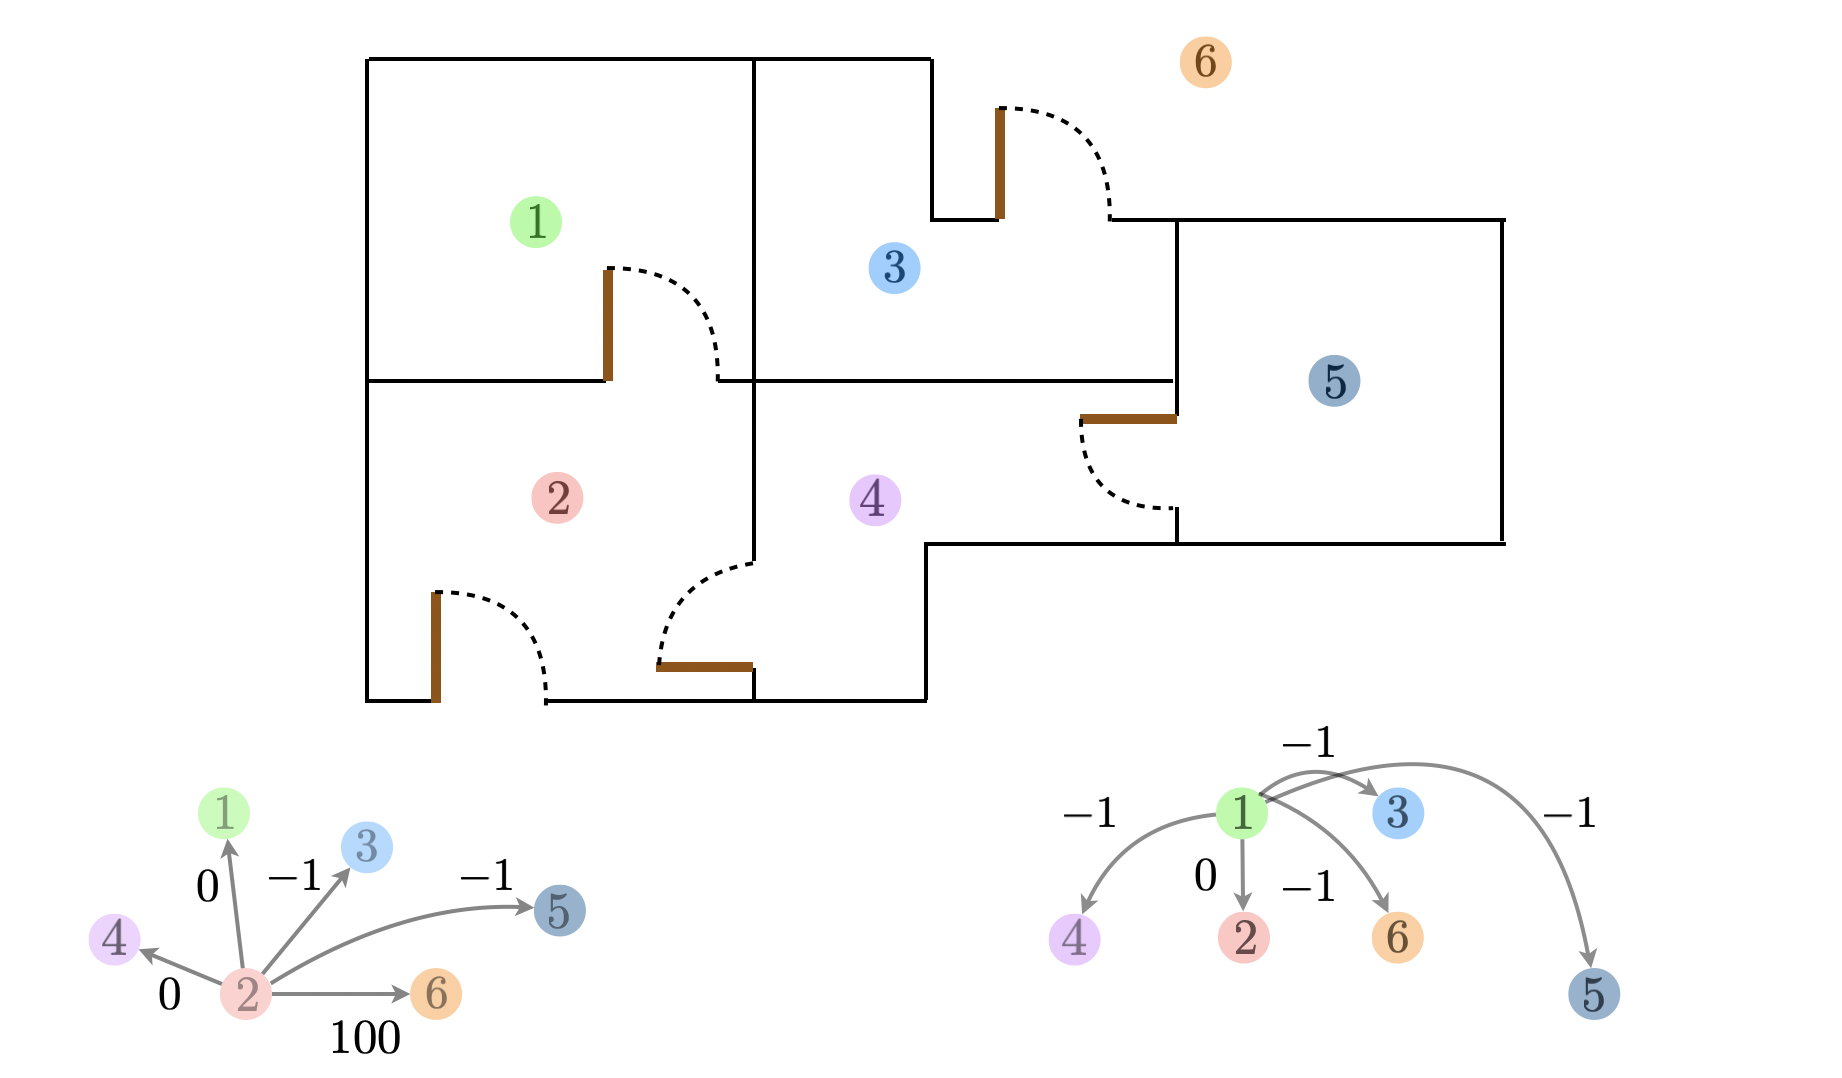

In [32]:
print("House Map")
Image('QLearningImage2.png',width=600,height=600)

In [24]:
# ====================================================================================
# Finding Quickest Paths from any Room to Room 6 which is Exit in this house
# ====================================================================================
all_room = [1,2,3,4,5,6]


In [25]:
for room in all_room:
    path = test(room-1,exit,brain_mat)
    path = [x+1 for x in path]
    print("\nQuickest path from room {} to 'Room 6' is to follow rooms in this order: {}\n".format(path[0], path))


Quickest path from room 1 to 'Room 6' is to follow rooms in this order: [1, 2, 6]


Quickest path from room 2 to 'Room 6' is to follow rooms in this order: [2, 6]


Quickest path from room 3 to 'Room 6' is to follow rooms in this order: [3, 6]


Quickest path from room 4 to 'Room 6' is to follow rooms in this order: [4, 2, 6]


Quickest path from room 5 to 'Room 6' is to follow rooms in this order: [5, 4, 2, 6]


Quickest path from room 6 to 'Room 6' is to follow rooms in this order: [6]



## End of Code For Reinforcement Learning
# End of Assignment